# POET Scene Siulation Example

### Initialize Target object
- The basic scene simulation approach involves initializing a Target object with RA and DEC specified.
- This will then query the Gaia DR2 catalog to find the Gaia G, Bp, and Rp magnitudes of the target and background stars. The default settings will return a maximum of 2000 of the brightest sources from the Gaia catalog and then store the 100 brightest sources to be included in the scene simulation.
- If no other additional information is provided for the target star, an appropriate stellar model is selected based on the stellar parameters that are (1) retrieved from the Gaia catalog, (2) estimated based on the Bp-Rp colour, or (3) manually specified by the user. A stellar model is defined by:
 - Teff, logg, radius, metallicity; any parameter that is not specified is set to the value estimated via (1) or (2) above.
- Either ATLAS9 or BTSettl stellar models can be selected. Defaults to ATLAS9 unless Teff<3500 K.
- Settings for the observations (e.g., total exposure time, selected POET bandpass, FoV position angle) can be specified at initialization or afterwards (if not specified, default values are adopted)
- The initialized object contains all of the target/background star information in the "gaia" attribute dictionary (p1.gaia) that will be used to generate a simulated scene.

In [1]:
from scene_sim import observation
obs1 = observation.Observation(
                        # prefix='GJ_436', # Filename prefix (optional; used for naming saved files)
                        # t_id='GJ 436', # Target name (optional; used for plots)
                        # ra=175.546, dec=+26.707, # RA, DEC (required for Gaia query)
    
                        prefix='AU_Mic', # Filename prefix (optional; used for naming saved files)
                        t_id='AU Mic', # Target name (optional; used for plots)
                        ra=311.2897, dec=-31.34089, # RA, DEC (required for Gaia query)
    
                        exptime=60., # Exposure time per frame [sec]
                        nstack=10, # Number of exposures to stack (total exposure time = exptime * nstack)
                        bandpass_id='VNIR', # 'VNIR', 'SWIR'
                        srch_nmax=10000,
                        srch_Gmax=15.,
                       )

757 Gaia source(s) found.


Generating scene...


100%|███████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


51 guide star(s) identified.


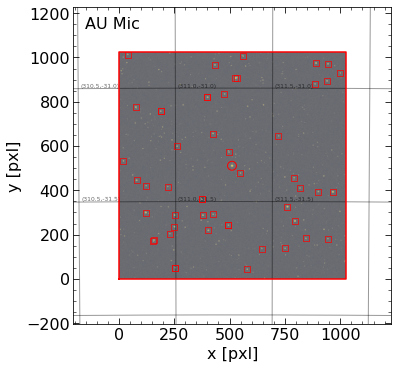

In [2]:
obs1.scene_sim() # Generate simulated POET observation
obs1.plot_fov() # Plot simulated image

### Simulate light curve
- A simulated light curve can be calculated and plotted with lc_sim() and plot_lc() similar to the scene_sim() and plot_fov() methods.
- Light curve is calculated for times specified by p1.tstart and p1.tend with a default cadence of the total exposure time (exptime * nstack).
- If a planet model is specified (in the obs1.pl_model dictionary), a transit model is injected into the light curve.

Generating simulated lightcurve...


100%|███████████████████████████████████████████████████████████████████| 41/41 [00:32<00:00,  1.26it/s]


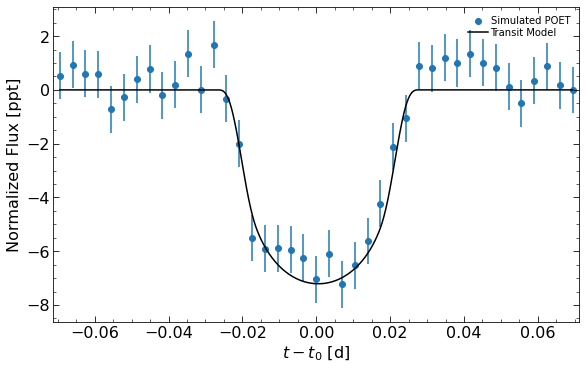

In [3]:
obs1.nstack = 5
obs1.tstart = 0.0 # [day]
obs1.tend = 0.14 # [day]
obs1.pl_model = {
               'RpRs':[0.0822], 
               'P':[2.64388], 
               't0':[0.07], 
               'b':[0.7], 
               'aRs':[13.73],
              }
obs1.lc_sim()
obs1.plot_lc()